<a href="https://colab.research.google.com/github/Sompoch-T/dads6003/blob/main/assignment/01_ml_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Housing.csv'
ori_df = pd.read_csv(file_path)
ori_df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print(ori_df['mainroad'].unique())
print(ori_df['guestroom'].unique())
print(ori_df['basement'].unique())
print(ori_df['hotwaterheating'].unique())
print(ori_df['airconditioning'].unique())
print(ori_df['prefarea'].unique())
print(ori_df['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [5]:
df = ori_df.copy()

df['mainroad'] = df['mainroad'].map(dict(yes=1, no=0))
df['guestroom'] = df['guestroom'].map(dict(yes=1, no=0))
df['basement'] = df['basement'].map(dict(yes=1, no=0))
df['hotwaterheating'] = df['hotwaterheating'].map(dict(yes=1, no=0))
df['airconditioning'] = df['airconditioning'].map(dict(yes=1, no=0))
df['prefarea'] = df['prefarea'].map(dict(yes=1, no=0))
df['furnishingstatus'] = df.apply(lambda x: 2 if x['furnishingstatus'] == 'furnished'\
                                  else 1 if x['furnishingstatus'] == 'semi-furnished'\
                                  else 0, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [6]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [27]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [21]:
linear_model = LinearRegression().fit(X_train,y_train)

pred = linear_model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'r2 score: {r2:.2f}')

Mean Squared Error: 1142383874558.44
r2 score: 0.68


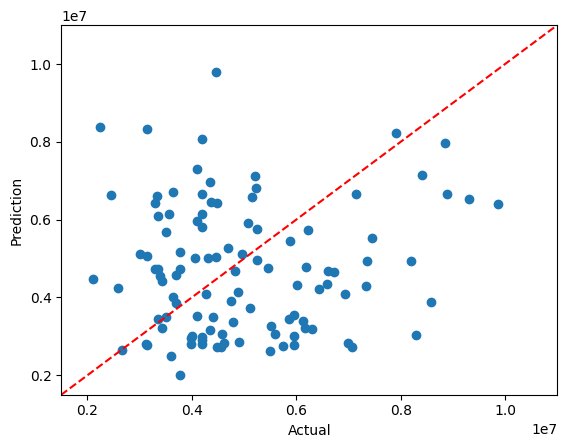

In [44]:
x_guide = np.arange(0,20000000,1000000)
y_guide = np.arange(0,20000000,1000000)

plt.scatter(y_test,pred)
plt.plot(x_guide, y_guide, linestyle = 'dashed', color='r')
plt.xlim(1500000,11000000)
plt.ylim(1500000,11000000)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [23]:
# save model
pickle.dump(linear_model, open('ml_6610422025.sav','wb') )

from google.colab import files
files.download('ml_6610422025.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>